In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from itertools import product

In [4]:
from commons import smoothen

In [5]:
fontsize = 14

# Preparations

## Loading the data

Let's start by loading the growth curves $N_i(t)$ :

In [6]:
Nt = smoothen(np.load("curves_raw.npy"), 10)

In [7]:
n_plates, n_rows, n_columns, n_points = Nt.shape
plates, rows, columns, points = map(np.arange, Nt.shape)

## Derivatives

Let's first compute the discrete derivative $\frac{\Delta N_i}{\Delta t} = \Delta N_i$ :

In [8]:
dNdt = Nt[..., 1:] - Nt[..., :-1]

Now let's calculate the relative growth rate $\rho_i(t) = \frac{\Delta N_i}{N_i}$ :

In [9]:
rho = dNdt / Nt[..., :-1]

## Converting to a `pd.DataFrame`

Seaborn is more convenient to use with a pandas dataframe, so let's create one :

In [10]:
data = pd.DataFrame(
    index = pd.MultiIndex.from_product(
        (np.arange(n_plates), np.arange(n_rows * n_columns)),
        names = ("plate", "location")),
    dtype = float
)

In [11]:
data["final population size"] = Nt[..., -1].reshape(-1)
data["maximum growth rate"] = rho.max(axis = -1).reshape(-1)
data["time to maximum growth"] = rho.argmax(axis = -1).reshape(-1)

In [12]:
columns = ["final population size", "maximum growth rate", "time to maximum growth"]

Let's replace the plate indexes, and reorder them :

In [13]:
data = data.loc[[1, 2, 3, 0]].reset_index()

In [14]:
data["plate"] = data["plate"].replace({0: "Gal + NaCl", 1: "Glc", 2: "Glc + NaCl", 3: "Gal"})

# Figure

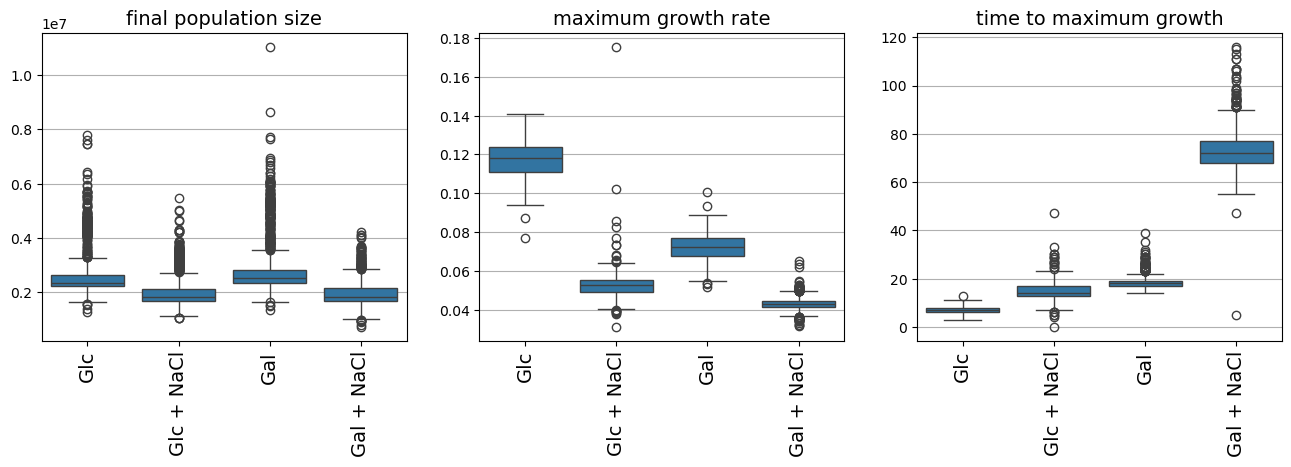

In [19]:
fig, axes = plt.subplots(ncols = 3, figsize = (16, 4))

for col, ax in zip(("final population size", "maximum growth rate", "time to maximum growth"), axes):
    sns.boxplot(data = data, x = "plate", y = col, ax = ax)
    ax.set_title(col, fontsize = fontsize)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(axis = "y")
    ax.tick_params(axis = "x", labelsize = fontsize, rotation = 90)

fig.savefig("plots/figure-4/summary-values.pdf", bbox_inches = "tight")
fig.savefig("plots/figure-4/summary-values.png", bbox_inches = "tight")

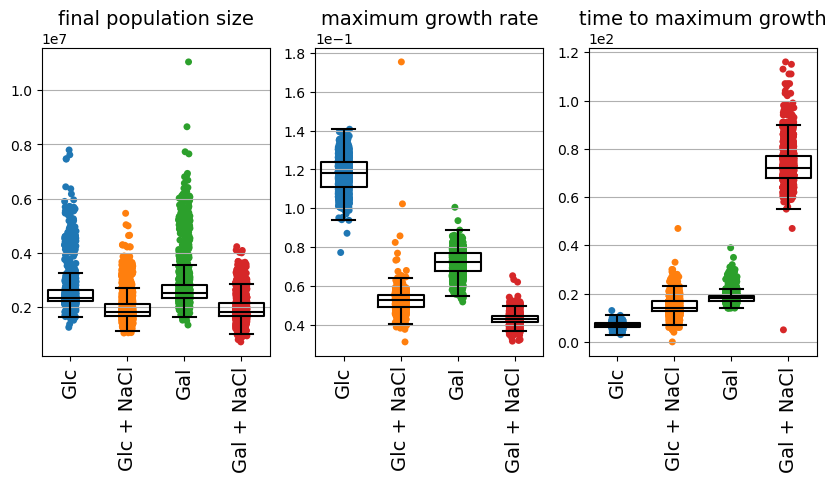

In [57]:
fig, axes = plt.subplots(ncols = 3, figsize = (10, 4))

for col, ax in zip(columns, axes):
    sns.stripplot(data[["plate", col]], x = "plate", y = col, hue = "plate", zorder = 0, ax = ax)
    sns.boxplot(data = data, x = "plate", y = col, fill = False, color = "black", fliersize = 0, ax = ax)
    ax.set_xlabel("")
    ax.set_ylabel("")
#    ax.set_ylabel(col, fontsize = fontsize)
    ax.set_title(col, fontsize = fontsize)
    ax.grid(axis = "y")
    ax.tick_params(axis = "x", labelsize = fontsize, rotation = 90)
    ax.ticklabel_format(axis = "y", style = "sci", scilimits = (0, 0))

fig.savefig("plots/figure-2/summary-values.pdf", bbox_inches = "tight")
fig.savefig("plots/figure-2/summary-values.png", bbox_inches = "tight")